In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))


trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

In [2]:
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
        
net=Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [4]:
X = torch.randn((28,28))

In [5]:
X = X.view(-1,28*28)

In [6]:
output = net(X)
output

tensor([[-2.3081, -2.3440, -2.3459, -2.1404, -2.2314, -2.2845, -2.4134, -2.2376,
         -2.3605, -2.3920]], grad_fn=<LogSoftmaxBackward0>)

In [7]:
import torch.optim as optim

In [8]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [9]:
for epoch in range(3): # 3 full passes over the data
    for data in trainset:  # `data` is a batch of data
        X, y = data  # X is the batch of features, y is the batch of targets.
        net.zero_grad()  # sets gradients to 0 before loss calc. You will do this likely every step.
        output = net(X.view(-1,784))  # pass in the reshaped batch (recall they are 28x28 atm)
        loss = F.nll_loss(output, y)  # calc and grab the loss value
        loss.backward()  # apply this loss backwards thru the network's parameters
        optimizer.step()  # attempt to optimize weights to account for loss/gradients
    print(loss)  # print loss. We hope loss (a measure of wrong-ness) declines! 

tensor(0.1931, grad_fn=<NllLossBackward0>)
tensor(0.0059, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)


In [12]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))
Accuracy:  0.968

Accuracy:  0.971


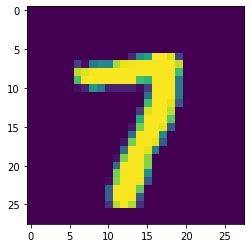

In [13]:
import matplotlib.pyplot as plt

plt.imshow(X[0].view(28,28))
plt.show()

In [14]:
a_featureset = X[0]
reshaped_for_network = a_featureset.view(-1,784) # 784 b/c 28*28 image resolution.
output = net(reshaped_for_network) #output will be a list of network predictions.
first_pred = output[0]
print(first_pred)

tensor([-2.6764e+01, -1.3225e+01, -1.1208e+01, -1.3470e+01, -2.1072e+01,
        -1.8410e+01, -4.1940e+01, -1.7881e-05, -1.8659e+01, -1.3762e+01],
       grad_fn=<SelectBackward0>)


In [15]:
biggest_index = torch.argmax(first_pred)
print(biggest_index)

tensor(7)
